# Groupe de Travail Applicatif

    Erwan Leroux
    Louis Marre
    Mohamed Nefzaoui
    Christ Noh
    Maxime Ory
    Professeur : Adrien Richou

### Sujet : Ruine d'une compagnie d'assurance

In [1]:
### import
%matplotlib inline
import random
import numpy.random as npr
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
from math import *
from random import *
import time

plt.rcParams["figure.figsize"] = (20,10)

### Avant propos

La fonction npr.exponential prend l'inverse du paramètre qu'on lui donne. Ainsi, il faut mettre 1/mu pour avoir mu et lambda pour obtenir 1/lambda.   
De plus, dans le sujet, on définit plusieurs variables, rec correspond à la variable p du sujet, cap à capital, mu à µ et lam à λ.

T est une suite de VA aléatoires qui suit une loi exponentielle de paramètre mu. Ici, T est un tableau dont les indices sont des valeurs de temps. De la même manière, X est un tableau dont les indices ont été obtenus par une loi exponentielle de paramètre 1/λ .

## Question 1 

Le but de la première question est d'écrire un code permettant de simuler des trajectoires du capital et d’illustrer les différents résultats de convergence.

Cette première fonction permet d'afficher l'évolution du capital en fonction du temps

In [2]:
#cap = capital initial = c
#temps = temps de la simulation = t
#rec = recettes versees par les clients  = p
#mu = mu de la loi expo des sinistres

def R_v0(cap, temps, rec, mu, lam):
    R = []
    R.append(cap)

    T = [] #Tableau des Ti
    X = [] #Tableau des Xi

    Abs = []
    Abs.append(0) #le temps commence a 0
    T.append(0)
    X.append(0)
    
    somme = 0
    indice = 0
    i = 1
    t = npr.exponential(1/mu,1)
    T.append(somme + t)
    somme = somme + t
    
    

    while( T[i] < temps ) : # Tant que le temps maximal n'est pas depasse, on continue
        t = npr.exponential(1/mu,1)
        T.append(somme + t)  # expovariate(mu) donne une loi expo de param mu
        somme = somme + t    # On  garde en memoire la somme
        X.append(npr.exponential(lam,1))
        R.append(R[indice] + rec*(T[i]-T[i-1]))
        R.append(R[indice+1] - X[i])
        Abs.append(T[i]) # On construit l'abscice qui correspond a nos points que nous allons afficher
        Abs.append(T[i])
        
        i = i + 1
        indice = indice + 2
        
    Abs.append(T[i])
    R.append(R[indice] + rec*(T[i]-T[i-1]))
    
    plt.plot(Abs,R)
    plt.xlabel("Temps", fontsize = 24)
    plt.ylabel("Capital", fontsize = 24)
    plt.title("Evolution du capital en fonction du temps", fontsize = 24)
    plt.legend(["Cap"])
    plt.savefig("Rv0 exemple 2",format='pdf')
    plt.show()
    

Cette fonction permet d'obtenir le capital au temps "temps". On commence par initialiser quatre tableaux.
R correspond au capital.
T correspond aux instants des sinistres.
X correspond aux couts des sinistres.
Abs est le tableaux des abscisses permettant de contruire le graphique. 

Tout d'abord, on initialise les tableaux. 
i est l'entier permettant d'accéder aux éléments des tableaux X et T. 
indice permet d'accéder aux éléments de R, à chaque tour de boucle, indice augmente de 2 unités car pour chaque sinistre, il y a deux valeurs du capital, et il faut repartir de la bonne.

La boucle while permet de similuer l'arrivée des sinistres. 
A chaque sinistre, on construit le point précédent la perte d'argent, puis, on retire le coup du sinistre au capital. On ajoute aussi à Abs, le moment où le sinistre a eu lieu pour pouvoir par la suite tracer le graphique. 

Quand on sort de la boucle, cela veut dire que le dernier sinistre a lieu après le temps paramétré. Ainsi, on ajoute cette fois-ci seulement la valeur du capital, sans enlever le coup du sinistre ( car il n'a pas encore eu lieu). 

Finalement, on trace le graphique représentant le capital en fonction du temps. 

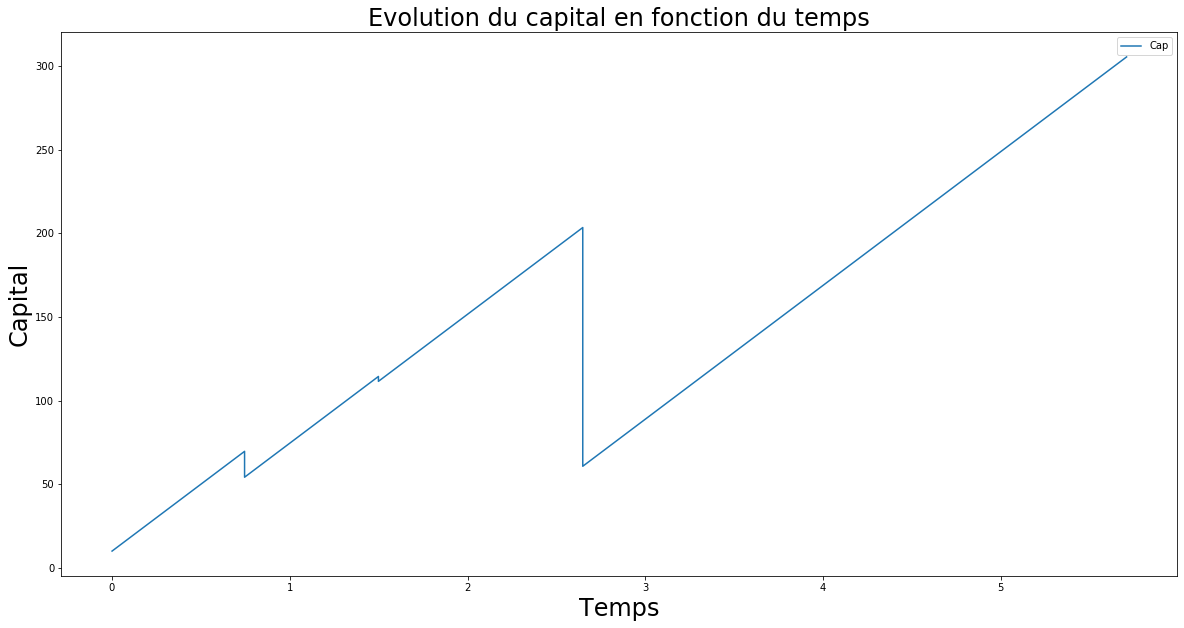

In [13]:
R_v0(10,5,80,1,79)

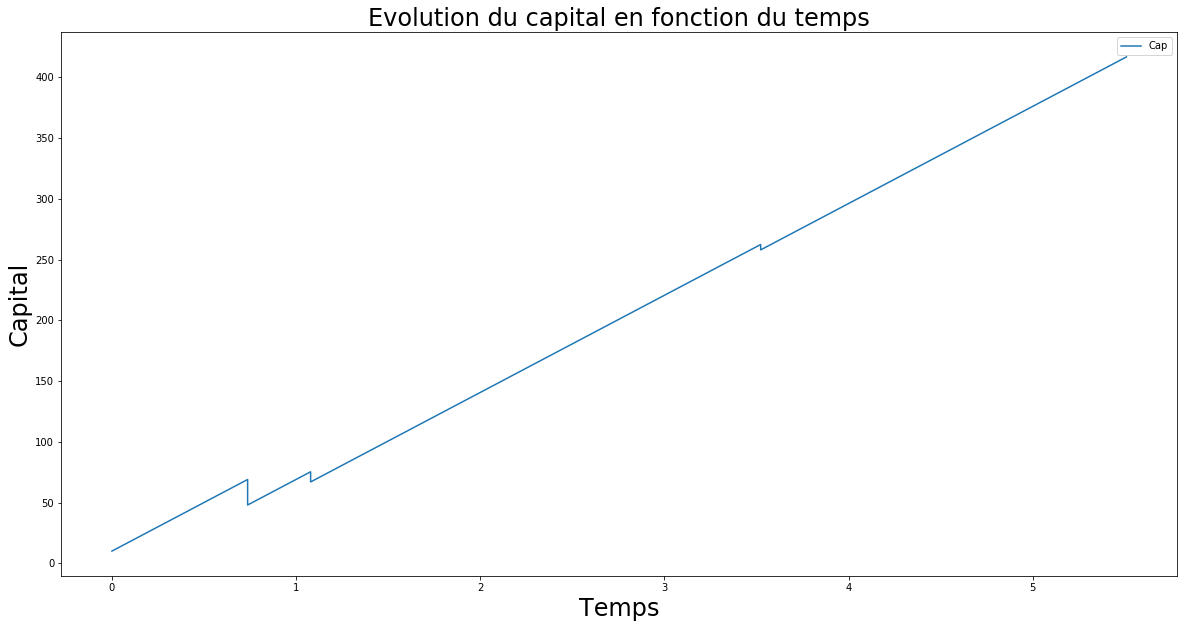

In [105]:
R_v0(10,5,80,1,30)
(cap, temps, rec, mu, lam)

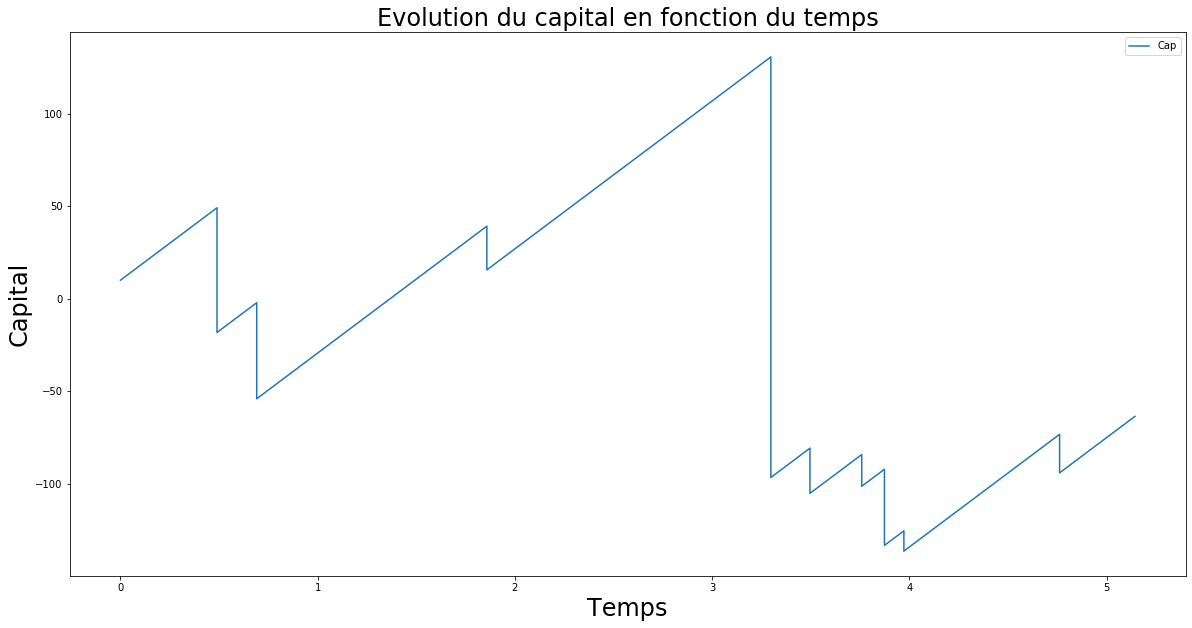

In [14]:
R_v0(10,5,80,1.5,100)

Cette fonction correspond à la précédente, la seule différence est qu'ici, on return λ ainsi que 1 si il n'y a pas eu de ruine et -1 dans le cas contraire.

In [3]:
#cap = capital initial = c
#temps = temps de la simulation = t
#rec = recettes versees par les clients  = p
#mu = mu de la loi expo des sinistres
#n = nombre de sinistres

def R_cap(cap, temps, rec, mu, lam):
    R = []
    R.append(cap)

    T = [] #Tableau des Ti
    X = [] #Tableau des Xi
    
    T.append(0)
    X.append(0)
    
    somme = 0
    indice = 0
    i = 1
    t = npr.exponential(1/mu,1)
    T.append(somme + t)
    somme = somme + t
    
    

    while( T[i] < temps ) : # Tant que le temps maximal n'est pas depasse, on continue
        t = npr.exponential(1/mu,1)
        T.append(somme + t)  # expovariate(mu) donne une loi expo de param mu
        somme = somme + t    # On  garde en memoire la somme
        X.append(npr.exponential(lam))
        R.append(R[indice] + rec*(T[i]-T[i-1]))
        R.append(R[indice+1] - X[i])
        
        if(R[indice + 1] < 0 ):
            return (lam,-1)
            
        i = i + 1
        indice = indice + 2
    
    R.append(R[indice] + rec*(T[i]-T[i-1]))
    
    return(lam,1)

In [4]:
R_cap(10,5,80,1,30) 

(30, -1)

La fonction ruine lance n fois la fonction R_cap, et nous renvoie le nombre de faillites, le nombres de fois où il n'y a pas eu faillite et les paramètres λ et µ.

In [4]:
def ruine(n,cap, temps, rec, mu,lam):
    Reu = [] #Tableau des reussites 
    Fail = [] #Tableau des ruines
    
    for i in range(n):
        x = R_cap(cap, temps, rec, mu,lam)
        if(x[1] == 1):
            Reu.append(x)
        else :
            Fail.append(x)
    
    return[len(Reu),len(Fail),mu,lam]

In [6]:
ruine(1000,10,5,80,1,100)

[1000, 0, 1, 100]

_________________________________________________________________________________________________________________________

# Question 1

In [3]:
def bon(temps, mu, lam,n):
    R = []
    R.append(0)
    delta = []
    T = [] #Tableau des Ti
    X = [] #Tableau des Xi
    Abs = []
    Abs.append(0) #le temps commence a 0
    T.append(0)
    X.append(0)
    somme = 0
    indice = 0
    i = 1
    t = npr.exponential(mu,1)
    T.append(somme + t)
    somme = somme + t
    while T[i] < temps :
       t= npr.exponential(mu,1)
       T.append(somme + t)
        
       somme = somme + t
       X.append(npr.exponential(lam,1))
       R.append(R[indice])
       R.append(R[indice+1] + X[i])
       Abs.append(T[i]) # On construit l'abscice qui correspond a nos points que nous allons afficher
       Abs.append(T[i])
        
       indice = indice + 2
       i = i + 1 
    Abs.append(T[i])
    R.append(R[indice])             
    
    #plt.plot(Abs,R,label="somme des Xt")
    #plt.legend("Ct")
    #plt.xlabel('str(T)')
    #plt.ylabel('str(X)')
    #plt.show()
    
    plt.plot(Abs,R)
    plt.xlabel("Temps", fontsize = 24)
    plt.ylabel("Capital", fontsize = 24)
    plt.title("Somme des Xt A MODIFIER", fontsize = 24)
    plt.legend(["Ct"])
    plt.show()
    
    

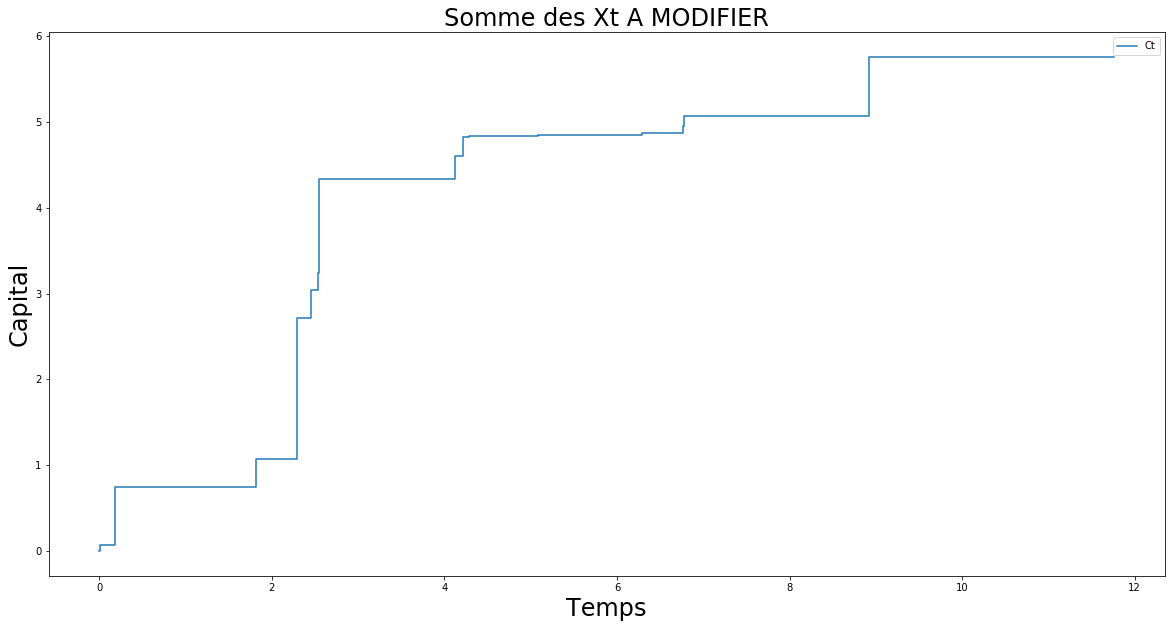

In [93]:
bon(10,1,0.5,10)

In [94]:
def R_v1(temps,mu, lam):
    R = []
    R.append(0)

    T = [] #Tableau des Ti
    X = [] #Tableau des Xi

    Abs = []
    Abs.append(0) #le temps commence a 0
    T.append(0)
    X.append(0)
    
    somme = 0
    indice = 0
    i = 1
    t = npr.exponential(mu,1)
    T.append(somme + t)
    somme = somme + t
    
    
    
    while( T[i] < temps ) : # Tant que le temps maximal n'est pas depasse, on continue
        t = npr.exponential(mu,1)
        T.append(somme + t)  # expovariate(mu) donne une loi expo de param mu
        somme = somme + t    # On  garde en memoire la somme
        X.append(npr.exponential(lam,1))
        X.append(X[i])
        Abs.append(T[i]) # On construit l'abscice qui correspond a nos points que nous allons afficher
        Abs.append(T[i])
        
        i = i + 1
        
        
    Abs.append(T[i])
    X.append(X[i])
    
    
    
    S = []
    S.append(0)
    
    z=np.linspace(0,temps,temps) # je divise mon axe des abcisses 
    ind=0
    k=0
    R = 0; 
    nt = 0 #nombre de sinistre 
    while (z[k] < temps ) : # tant que je n'ai pas le temps fixé 
    
        if T[ind] < z[k]:
            #print(nt) # si mon T1
            nt = nt + 1
            #on compte le nombre de sinistre
            R = R + X[nt]
            S.append(R/z[k])  #on fait la somme des X jusqu'au nombre de sinistre qu'on divise par la variable t
            ind = ind + 1
        else :
            R = R + X[ind]
            S.append(R/z[k])
        k = k + 1
        
    plt.plot(z,S)
    
    plt.xlabel("Temps", fontsize = 24)
    plt.ylabel("Capital", fontsize = 24)
    plt.title("Mettre un titre", fontsize = 24)
    plt.legend(["Ct/t"])
    
    
    plt.show()

In [ ]:
R_v1(10000,1,1)

(array([5.000e+00, 5.000e+00, 1.200e+01, 3.400e+01, 5.700e+01, 8.600e+01,
        1.540e+02, 2.260e+02, 3.870e+02, 5.090e+02, 7.650e+02, 9.870e+02,
        1.518e+03, 1.939e+03, 2.519e+03, 3.138e+03, 3.846e+03, 4.597e+03,
        5.157e+03, 5.693e+03, 6.040e+03, 6.484e+03, 6.483e+03, 6.548e+03,
        6.458e+03, 5.995e+03, 5.528e+03, 4.855e+03, 4.260e+03, 3.545e+03,
        2.975e+03, 2.361e+03, 1.878e+03, 1.451e+03, 1.071e+03, 7.860e+02,
        5.440e+02, 3.910e+02, 2.600e+02, 1.800e+02, 1.090e+02, 7.000e+01,
        3.500e+01, 2.300e+01, 1.800e+01, 1.100e+01, 5.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00]),
 array([-3.80900822, -3.64304277, -3.47707732, -3.31111186, -3.14514641,
        -2.97918095, -2.8132155 , -2.64725004, -2.48128459, -2.31531914,
        -2.14935368, -1.98338823, -1.81742277, -1.65145732, -1.48549187,
        -1.31952641, -1.15356096, -0.9875955 , -0.82163005, -0.65566459,
        -0.48969914, -0.32373369, -0.15776823,  0.00819722,  0.17416268,
         0.

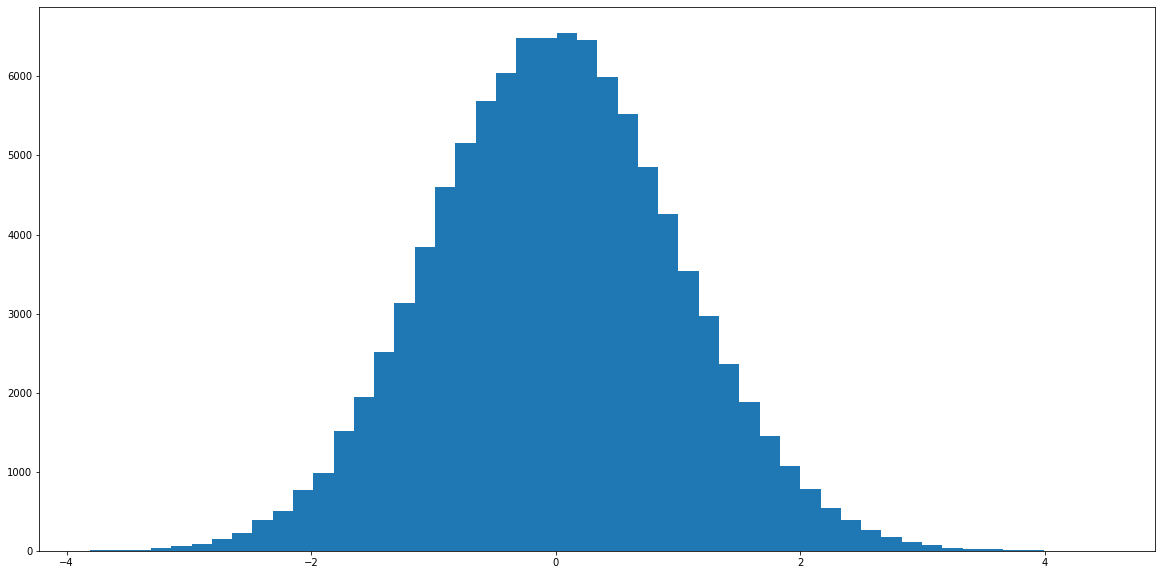

In [4]:
lam  = 1
t = 1000
mu=1
n = 100000
S=[]
S.append(0)

for i in range (0,n):
    
    X = npr.exponential(1,t)
    S.append(np.sqrt(t)*(sum(X)/t - (lam*mu)))

#plt.plot(x,y,'r',label="densite")
plt.hist(S,bins=50)

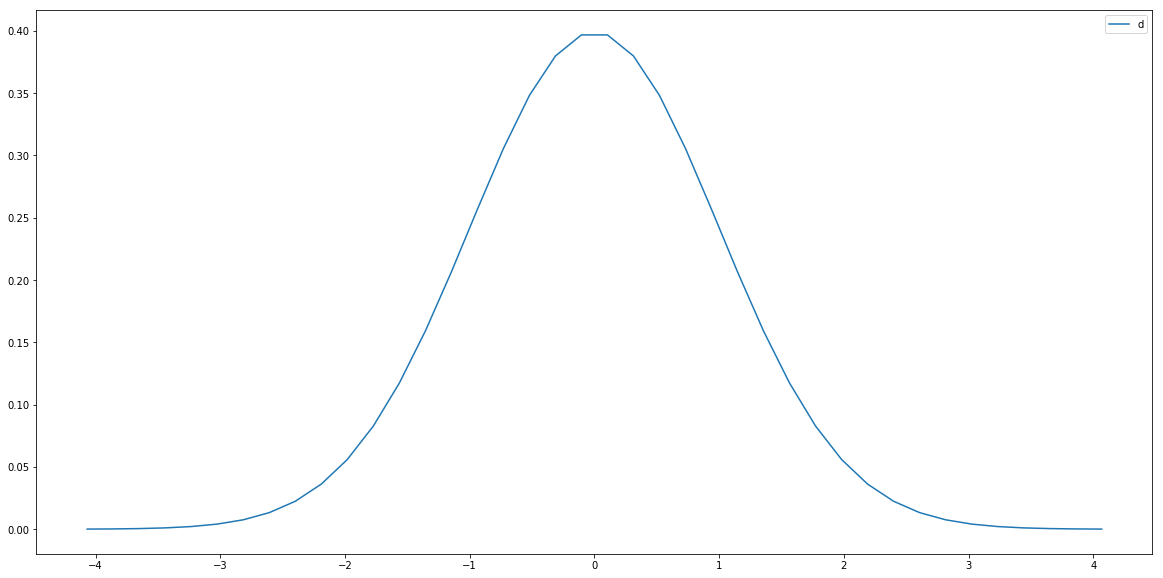

In [32]:
def Normale(temps,mu, lam,n):
    R = []
    R.append(0)

    T = [] #Tableau des Ti
    X = [] #Tableau des Xi

    Abs = []
    Abs.append(0) #le temps commence a 0
    T.append(0)
    X.append(0)
    
    somme = 0
    indice = 0
    i = 1
    t = npr.exponential(mu,1)
    T.append(somme + t)
    somme = somme + t
    
    
    
    while( T[i] < temps ) : # Tant que le temps maximal n'est pas depasse, on continue
        t = npr.exponential(mu,1)
        T.append(somme + t)  # expovariate(mu) donne une loi expo de param mu
        somme = somme + t    # On  garde en memoire la somme
        X.append(npr.exponential(lam,1))
        X.append(X[i])
        Abs.append(T[i]) # On construit l'abscice qui correspond a nos points que nous allons afficher
        Abs.append(T[i])
        
        i = i + 1
        
        
    Abs.append(T[i])
    X.append(X[i])
    
    
    S = []
    S.append(0)
    
    z=np.linspace(0,temps,temps)# je divise mon axe des abcisses
    ind=0
    k=1
    R = 0; 
    nt = 0 #nombre de sinistre 
    i=0   
    while (z[k] < temps ) : # tant que je n'ai pas le temps fixé 
        if T[ind] < z[k]:
           
            nt = nt + 1            #on compte le nombre de sinistre
            R = R + X[nt]
            S.append(sqrt(z[k])*((R/z[k]) - (mu*lam)))  #on fait la somme des X jusqu'au nombre de sinistre qu'on divise par la variable t
            ind = ind + 1
        else :
            R = R + X[ind]
            S.append(sqrt(z[k])*((R/z[k]) - (mu*lam)))
        k = k + 1
    R = R + X[nt]
    S.append(sqrt(z[k])*((R/z[k]) - (mu*lam)))
    m = max(np.abs(S))
    x=np.linspace(-m,m,n)
    y = sps.norm.pdf(x)
    plt.plot(x,y)
    #plt.hist(S,bins=n,normed=1,label="data") partie à travailler en groupe et présenter au prof pour la prochaine séance 
    plt.legend('data')
    #plt.xlabel('T')
    #plt.ylabel('X')
    #plt.plot(z,S)
    
    
Normale(1000,1,1,40)

___________________________________________________________________________________________________________________________

# Question 2

Le but de cette question est d'étudier numériquement la probabilité de ruine lorsque l’on change la loi des sinistres.

Cette fonction permet de visualiser le graphe du nombre de ruine en fonction de lambda.

In [7]:
def graph_1(tours,n,cap, temps, rec, mu,lam, pas):

    list_ruine = [] #nombre de ruines # ordonnée
    lambd = [] #Abscisse les lam utilisés pour les simulations
    N = []
    
    X = ruine(n,cap,temps,rec,mu,lam)
    nb_ruine = X[1]/n
    lam = X[3]
    list_ruine.append(nb_ruine)
    lambd.append(lam)
    N.append(1)
    
    for i in range(tours):
        lam = lam + pas

        X = ruine(n,cap,temps,rec,mu,lam)
        nb_ruine = X[1]/n
        lam = X[3]
        
        list_ruine.append(nb_ruine)
        lambd.append(lam)
        N.append(1)
    
    
    plt.plot(lambd,list_ruine)
    plt.plot(lambd,N)
    
    plt.xlabel("Valeur de lambda", fontsize = 24)
    plt.ylabel("Probabilité de ruine", fontsize = 24)
    plt.title("Evolution de la probabilité de ruine en fonction de lambda", fontsize = 24)
    plt.legend("λ")
    plt.savefig("GrapheLambda",format='pdf')
    plt.show()

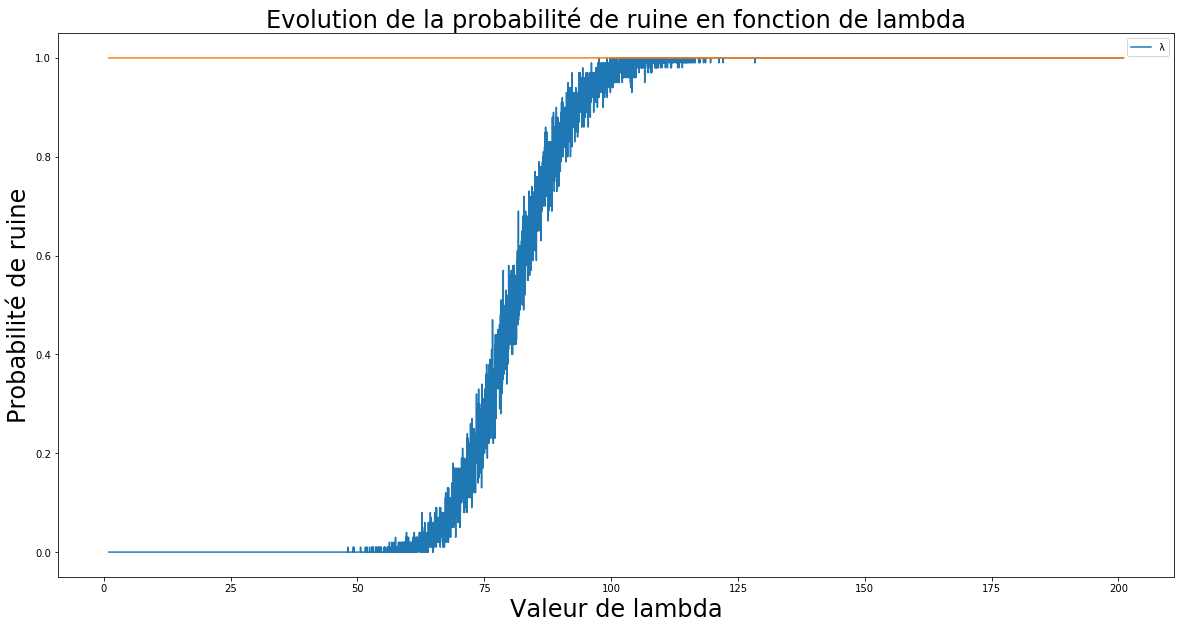

In [8]:
graph_1(10000,100,1000,200,80,1,1,0.02)

On voit que quand λ augmente, c'est à dire que 1/λ diminue, la probalité du nombre de ruine croît. 

_________________________________________________________________________________________________________________________

_________________________________________________________________________________________________________________________

On regarde la variance de l'estimateur de proba, en fonction du nombre de simulations.

On appelle n fois la fonction ruine avec les mêmes paramètres, et on note le nombre de ruines a chaque fois. 

In [6]:
def estimateur_graphe(n,cap, temps, rec, mu,lam):
    list_ruine = []
    Abs = [] 

    
    for i in range(1,n):
        X = ruine(i,cap,temps,rec,mu,lam)
        nb_ruine = (X[1])/i
        
        list_ruine.append(nb_ruine)
        Abs.append(i)
    
    axes=plt.gca()
    axes.set_ylim(-0.05,1.05)
    plt.plot(Abs,list_ruine)
    plt.xlabel("Nombre de simulations", fontsize = 24)
    plt.ylabel("Probabilité de ruine", fontsize = 24)
    plt.title("Evolution de la probabilité de ruine en fonction du nombre de simulations", fontsize = 24)
    #plt.legend("")
    plt.savefig("RuineSelonNbSimu2",format='pdf')
    plt.show()

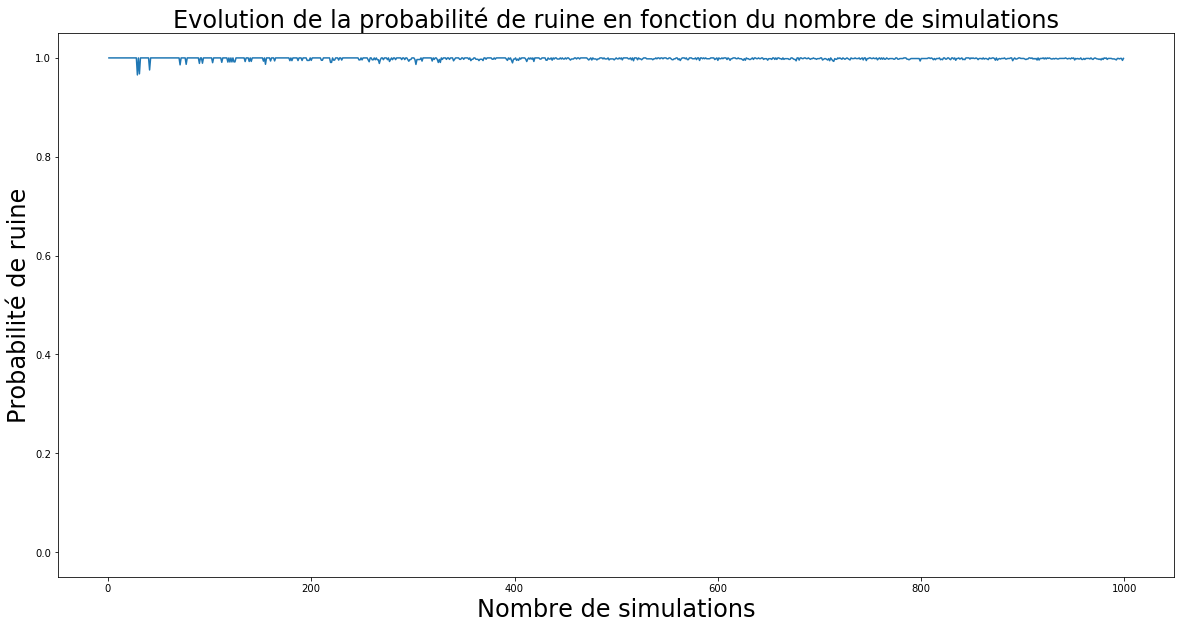

In [30]:
estimateur_graphe(1000,1000,10,80,1,5000)

Ce cas est intéressant, en effet par le calcul,   
λ*µ*exp[ -(p-λµ)/λµ]/p donne 0.84   
si on prend 
λ = 1/79
µ = 1
p = 80

Ainsi, on doit observer une convergence vers 0.84 quand on augmente le nombre de répétitions

In [7]:
estimateur_graphe(1000,1000,1000,80,1,79)

KeyboardInterrupt: 

In [10]:
estimateur_graphe(1000,1000,10000,80,1,79)

KeyboardInterrupt: 

_________________________________________________________________________________________________________________________

_________________________________________________________________________________________________________________________

Ainsi, il est intéressant de regarder l'effet de l'horizon de temps sur nos simulations. 

La fonction une_ruine, réalise une simulation et renvoie l'indice de la faillite ou temps + 1 si il n'y en a pas eu

In [12]:
def une_ruine(cap, temps, rec, mu,lam):
    R = []
    R.append(cap)

    T = [] #Tableau des Ti
    X = [] #Tableau des Xi
    
    T.append(0)
    X.append(0)
    
    somme = 0
    indice = 0
    i = 1
    t = npr.exponential(1/mu,1)
    T.append(somme + t)
    somme = somme + t
    
    

    while( T[i] < temps ) : # Tant que le temps maximal n'est pas depasse, on continue
        t = npr.exponential(1/mu)
        T.append(somme + t)  
        somme = somme + t    # On  garde en memoire la somme
        X.append(npr.exponential(lam))
        R.append(R[indice] + rec*(T[i]-T[i-1]))
        R.append(R[indice+1] - X[i])
        
        if(R[indice + 1] < 0 ):
            return (T[i][0]) #On return l'indice de la faillite.
            
        i = i + 1
        indice = indice + 2
    
    R.append(R[indice] + rec*(T[i]-T[i-1]))
    
    return(temps+1) #on sait qu'il n'y a pas eu de faillite.

La fonction horizon_meme_simulation appelle n fois la fonction une ruine, et affiche un graphique.  
Chaque saut indique qu'une simulation a fait faillite à cet indice de temps.  

In [13]:
def horizon_meme_simulation(n,cap, horizon, rec, mu,lam):
    ind_ruine = []
    Ord = []
    Abs = []
    
    Ord.append(0)
    Abs.append(0)
    
    
    for k in range(n):
        x = une_ruine(cap, horizon, rec, mu,lam)
        ind_ruine.append( x )
    
    #Dans le vecteur ind_ruine, on a n simulations. temps+1 si il n'y a pas eu faillite, et l'indice de la 
    #faillite dans le cas contraire. 
   
    ind = np.sort(ind_ruine)
   
    somme = 0
    for i in range(n):
        if( ind[i] > horizon ):
            Ord.append(somme)
            Abs.append(ind[i])
        else :
            Ord.append(somme)
            somme = np.round(somme + 1/n,1)
            Ord.append(somme)
            Abs.append(ind[i])
            Abs.append(ind[i])
    
    if(somme == 1):
        Ord.append(1)
        Abs.append(horizon)
 
    
    #print(len(ind),len(Ord))
    #print(ind)
    #print(Ord)
    
    axes=plt.gca()
    axes.set_ylim(-0.05,1.05)
    axes.set_xlim(-0.05,horizon + 1)
    plt.step(Abs,Ord)
    plt.xlabel("valeur de l'horizon", fontsize = 24)
    plt.ylabel("Probabilité de ruine", fontsize = 24)
    plt.title("Evolution de la probabilité de ruine en fonction de l'horizon", fontsize = 24)
    #plt.legend("")
    plt.savefig("ImpactHorizon",format='pdf')
    plt.show()

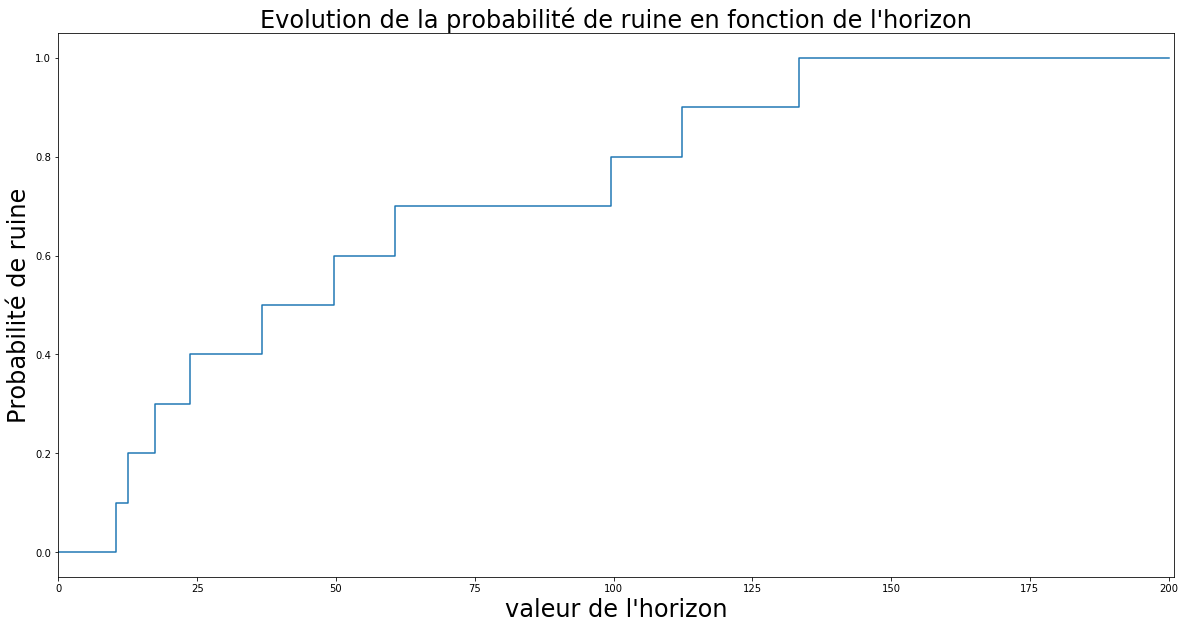

In [21]:
horizon_meme_simulation(10,1000,200,80,1,100)

Ici, on peut voir qu'avec un temps assez long, 150 par exemple, toutes les simulations auraient donné une faillite.   
En revanche, avec un temps égal à 75, on voit que seulement une partie des simulations auraient données une faillite, alors que l'on est dans le cas où la probablilité de faillite tend vers 1.  
Ceci vient du fait que la probablilité de faillite tend vers 1 lorsque t tend vers l'infini. Ici, on ne peut pas atteindre l'infini, mais l'on peut tout de même augmenter la valeur de l'horizon.   
On voit que dans un cas limite (car p est assez proche de µλ), on ne peut pas prendre des temps trop faibles.  

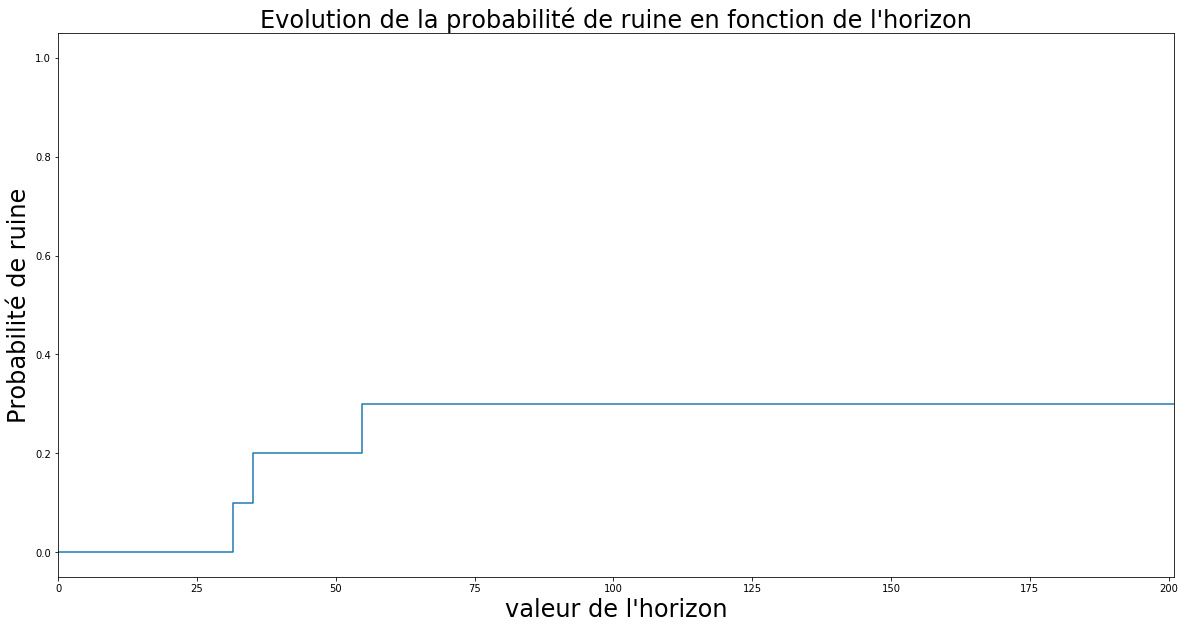

In [57]:
horizon_meme_simulation(10,1000,200,80,1,72)

____________________________________________________________________________________________________________________________


_________________________________________________________________________________________________________________________

# Question 3

Dans cette question, on va utiliser un taux de rendement instantané r. Pour que notre étude soit relativement proche de la réalité, nous allons utiliser un taux de rendement de 1.9%. C'est celui utilisé par axa pour leur assurance vie

In [46]:
r = 0.0013 #taux de rendement

Commencons par tracer des trajectoires

In [47]:
def trajectoire_taux_rendement(cap, temps, mu, lam):
    Capital = []
    Capital.append(cap)

    T = [] #Tableau des Ti
    X = [] #Tableau des Xi

    Abs = []
    Abs.append(0) #le temps commence a 0
    T.append(0)
    X.append(0)
    
    somme = 0
    indice = 0
    i = 1
    t = npr.exponential(mu,1)
    T.append(somme + t)
    somme = somme + t
    
    
    
    while( T[i] < temps ) : # Tant que le temps maximal n'est pas depasse, on continue
        t = npr.exponential(mu,1)
        T.append(somme + t)  # expovariate(mu) donne une loi expo de param mu
        somme = somme + t    # On  garde en memoire la somme
        X.append(npr.exponential(1/lam,1)
                )
        e = np.exp(r*(T[i]-T[i-1]))
        Capital.append( Capital[indice]*e  )
        Capital.append(Capital[indice+1] - X[i])
        
        Abs.append(T[i]) # On construit l'abscice qui correspond a nos points que nous allons afficher
        Abs.append(T[i])
        
        i = i + 1
        indice = indice + 2
        
    Abs.append(T[i])
    e = np.exp(r*(T[i]-T[i-1]))
    Capital.append(Capital[indice]*e)
    
    plt.plot(Abs,Capital)
    plt.xlabel("temps")
    plt.ylabel("capital")
    plt.show()

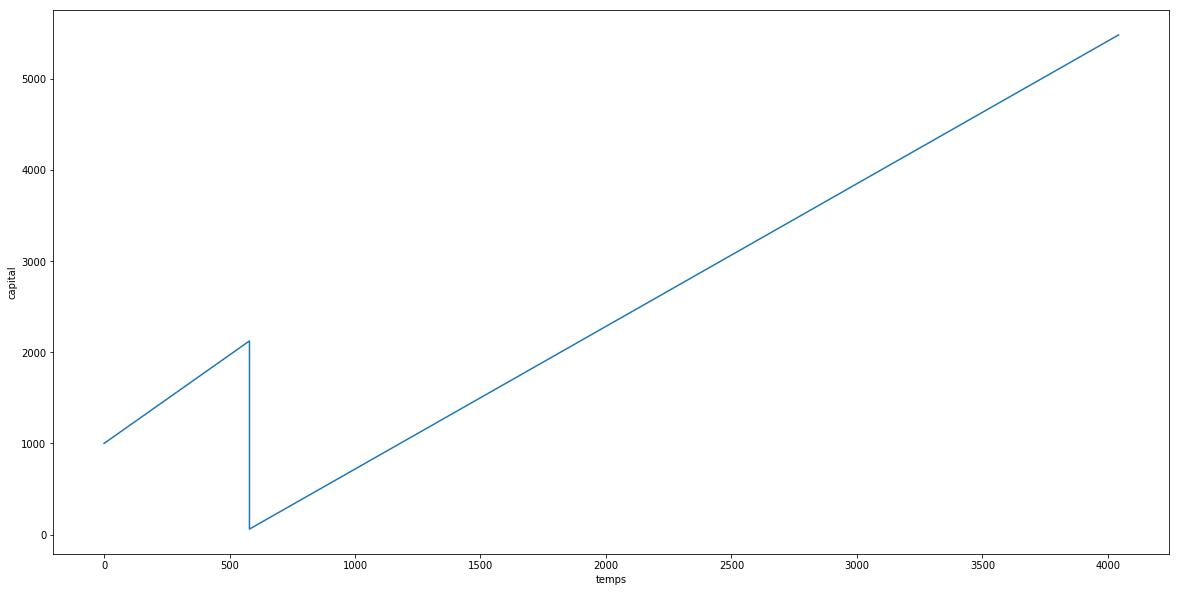

In [61]:
trajectoire_taux_rendement(1000, 1000, 1000, 0.0005)

# Question 4

Ici, on veut des arrivées et départs aléatoires de clients  

In [5]:
def Rademacher(p): #p correspond à la proba de succès.
    r = np.random.binomial(1,p) 
    #la loi de rademacher n'est pas disponible dans le package numpy
    # Cependant, il est facile de l'obtenir depuis la loi de Bernouilli
    return 2*r -1

Cette première fonction affiche le graphique de l'évolution de la population de l'entreprise. Il s'agit la de la première version de cette fonction. 

In [17]:
def graphe_clients0(temps, a, d):
    start_time = time.time()
    
    #
    # Peut être prendre 1/a et 1/d
    #
    
    # X : variable aléatoire qui représente les arrivées de paramètre a.
    # Y : variable aléatoire qui représente les départs de paramètre d.
    # Ces variables sont indépendantes donc on peut prendre M = min(X,Y) qui suit une loi expo de paramètre a+d.
    
    T = [] #Tableau des Ti
    #gere le temps
    
    Pop = [] #Tableau représentant l'ensemble de la population au temps t.

    Abs = []
    Abs.append(0) #le temps commence a 0
    
    T.append(0)
    Pop.append(0)
        
    somme = 0
    indice = 0
    i = 0
    z = d/(a+d) # Proba(X>Y) un départ a lieu avant une arrivée

    while( T[indice] < temps ) : # Tant que le temps maximal n'est pas depasse, on continue
        t = npr.exponential(1/(a+d),1)
        T.append(somme + t)  # expovariate(a+d) donne une loi expo de param a+d
        somme = somme + t    # On  garde en memoire la somme
        
        
        
        
        #On détermine s'il s'agit d'une arrivée ou d'un départ
        
        if(Pop[i] == 0): #si il n'y a personne il s'agit forcément d'une arrivée
            Pop.append(0)
            Pop.append(1)
        else: #Si la population totale n'est pas nulle, un client peut partir
            r = Rademacher(z)
            
            # On compare, est ce que X > Y --> départ
            if(r==-1):
                 # Ajustement de la population
                Pop.append(Pop[i])
                Pop.append(Pop[i] + 1)
                
            # Ou Y > X --> départ
            else:
                 # Ajustement de la population
                Pop.append(Pop[i])    
                Pop.append(Pop[i] - 1)
                
        
        # On construit l'abscice qui correspond a nos points que nous allons afficher
        Abs.append(T[indice])
        Abs.append(T[indice])
        
        i = i + 2
        indice = indice + 1
        
    Abs.append(T[indice])
    Pop.append(Pop[i])
    
    ### Suivant les paramètres ARRIVEE, DEPART, POPULATION
    ### On ne trace pas les memes graphiques
    
    plt.plot(Abs,Pop)
    plt.xlabel("Temps", fontsize = 24)
    plt.ylabel("Population", fontsize = 24)
    plt.title("Evolution ", fontsize = 24)
    plt.legend(["pop"])
    plt.show()
    
    print("Temps d execution : %s secondes ---" % (time.time() - start_time))


Cas où a > d, on remarque une croissance forte de la population

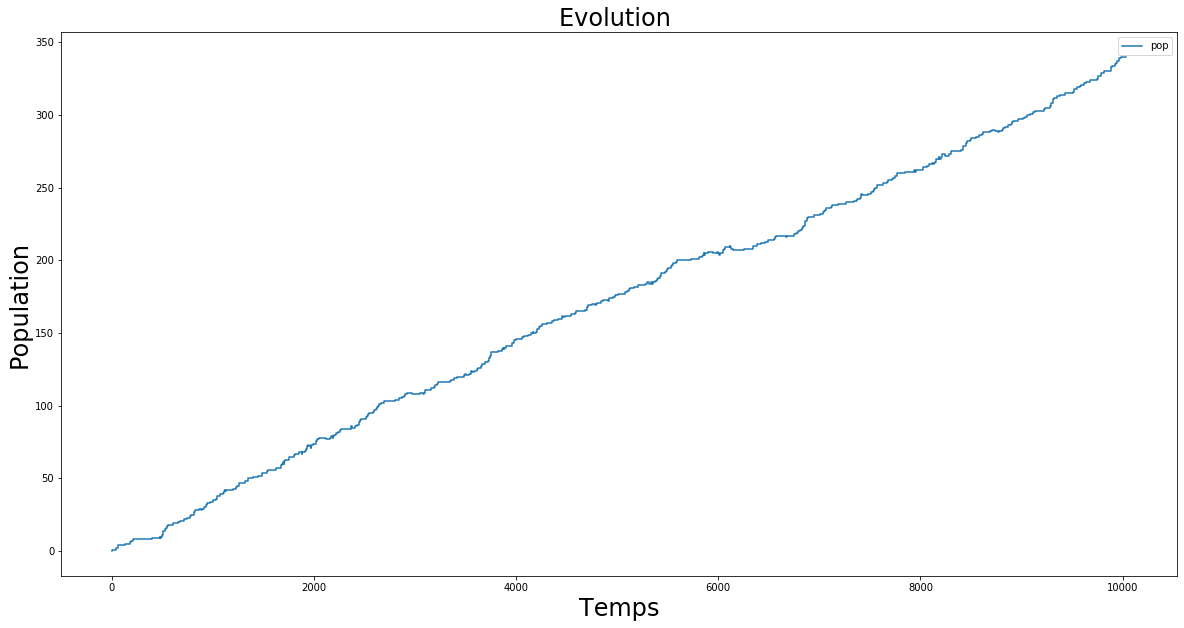

Temps d execution : 0.2742490768432617 secondes ---


In [61]:
 graphe_clients0(10000, 20, 2)

Cas d'égalité, on remarque que la taille de la clientèle fluctue beaucoup

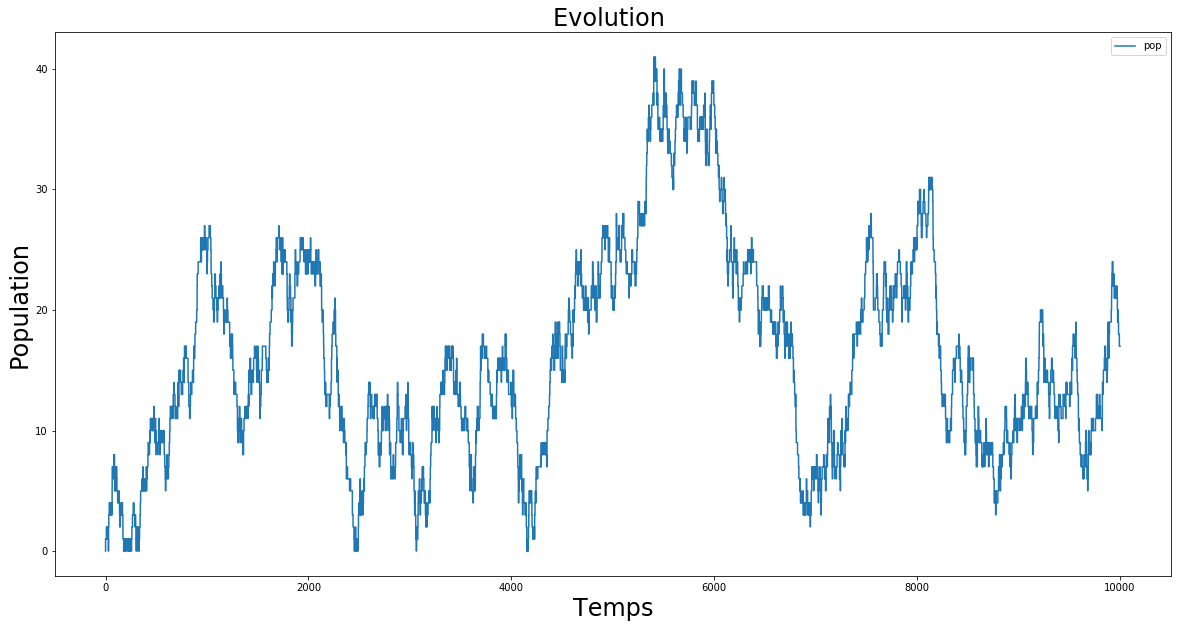

Temps d execution : 0.32329463958740234 secondes ---


In [62]:
 graphe_clients0(10000, 2, 2)

Cas ou on a d > a, on n'a aucun client, cas non intéressant.

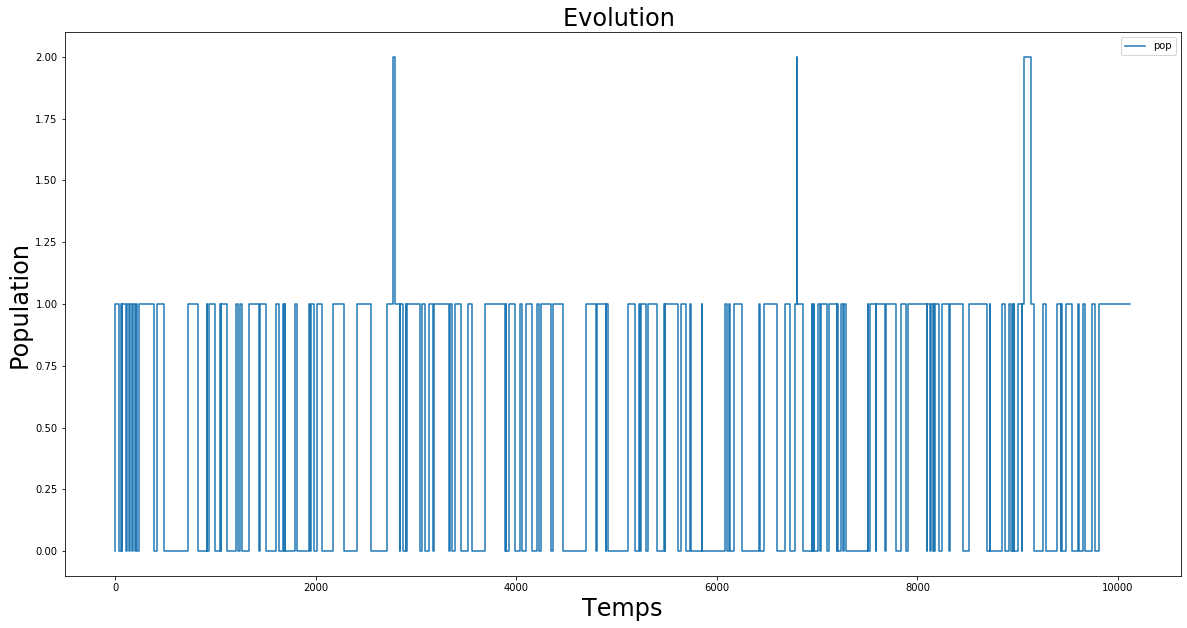

Temps d execution : 0.28626084327697754 secondes ---


In [63]:
 graphe_clients0(10000, 2, 50)

________________________________________________________________________________________________________________________________

La fonction graphe_clients est la version finale de la fonction précédente.  
X  : variable aléatoire qui suit une loi exponentielle de paramètre a, modélise les arrivées     
Yn : variable aléatoire qui suit une loi exponentielle de paramètre d, modélise les départs
n = nombre de clients


Ainsi, on a donc n+1 variables aléatoires. Une variable pour les arrivées et n variables de départ (chaque client est succeptible de partir).  
Ainsi en prennant le minimum de ces n+1 variables, on obtient une variable qui suit une loi exponentielle de paramètre a + n*d

A chaque tour on tire donc et on obtient un temps. Ce temps correspond a un évènement, départ où arrivée de client.  
Pour connaître la nature de cet évènement, on tire une variable de Rademacher de paramètre Proba(X>Y) (un départ a lieu avant une arrivée). Par conséquent, si r = 1, on a un succès et c'est un départ, ainsi la population diminue de 1. Dans le cas contraire, on obtient une arrivée.  

In [6]:
def graphe_clients(temps, a, d, popu_init):
    # Debut du decompte du temps
    start_time = time.time()
    
    #
    # Peut être prendre 1/a et 1/d
    #
    
    # X : variable aléatoire qui représente les arrivées de paramètre a.
    # Y : variable aléatoire qui représente les départs de paramètre d.
    # Ces variables sont indépendantes donc on peut prendre M = min(X,Y) qui suit une loi expo de paramètre a+d.
    
    T = [] #Tableau des Ti
    #gere le temps
    
    Pop = [] #Tableau représentant l'ensemble de la population au temps t.

    Abs = []
    Abs.append(0) #le temps commence a 0
    
    T.append(0)
    if(popu_init != 0):
        Pop.append(popu_init)
    else:
        Pop.append(0)
        
        
    somme = 0
    indice = 0
    i = 0
    
    
    while( T[indice] < temps ) : # Tant que le temps maximal n'est pas depasse, on continue
        n = Pop[i]
        t = npr.exponential(1/(a+n*d),1)
        
        T.append(somme + t)  # expovariate(a+d) donne une loi expo de param a+d
        somme = somme + t    # On  garde en memoire la somme
        indice = indice + 1
        
        
        
        z = n*d/(a+n*d) # Proba(X>Y) un départ a lieu avant une arrivée
        
            
        #On détermine s'il s'agit d'une arrivée ou d'un départ
        r = Rademacher(z) # z correspond à la probabilité qu'un départ se fasse avant une arrivée.
        
        if(r==-1):#Si r vaut -1, c'est qu'il y a eu une arrvée
            Pop.append(Pop[i])
            Pop.append(Pop[i] + 1)
            Abs.append(T[indice])
            Abs.append(T[indice])
                
                
        else: #Dans le cas contraire, r vaut 1, on a le succès, et donc un départ. 
            Pop.append(Pop[i])
            Pop.append(Pop[i] - 1)
            Abs.append(T[indice])
            Abs.append(T[indice])

        i = i + 2
            
        
        # On construit l'abscice qui correspond a nos points que nous allons afficher
        
    Abs.append(T[indice])
    Pop.append(Pop[i])
        
    
    plt.plot(Abs,Pop)
    plt.xlabel("Temps", fontsize = 24)
    plt.ylabel("Population", fontsize = 24)
    plt.title("Evolution ", fontsize = 24)
    plt.legend(["pop"])
    plt.savefig("EvolutionClients",format='pdf')
    plt.show()
    
    # Affichage du temps d execution
    print("Temps d execution : %s secondes ---" % (time.time() - start_time)) 

## Cas où a <<< d

Dans ce premier cas, on remarque que le nombre de client diminue fortement. 

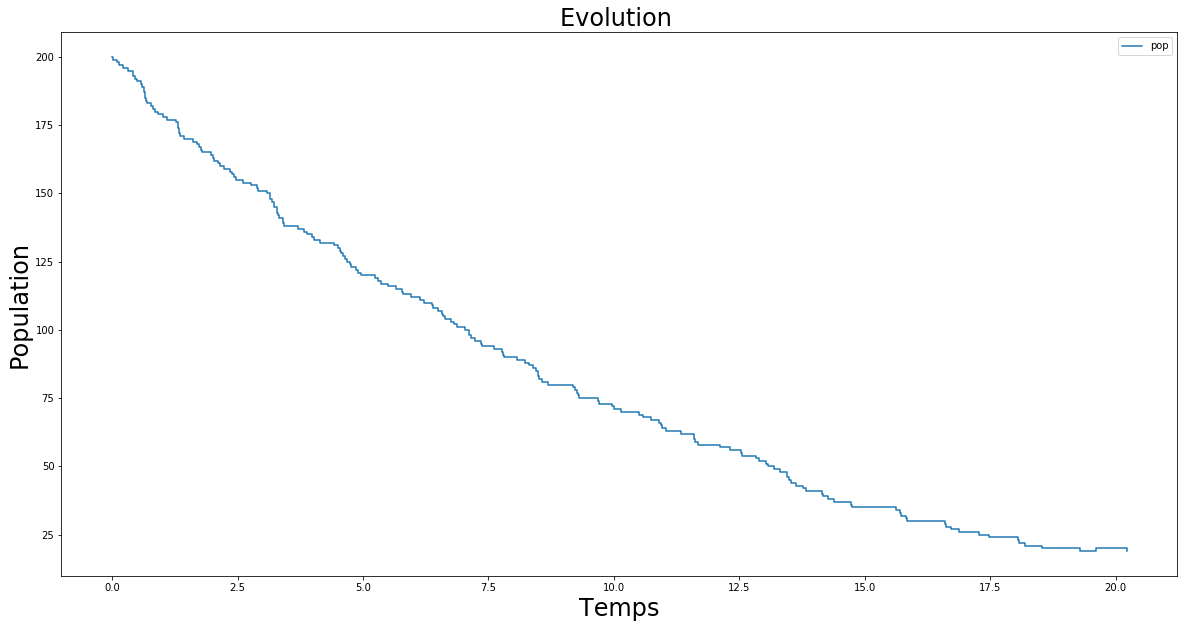

Temps d execution : 0.27625107765197754 secondes ---


In [65]:
graphe_clients(20, 0.01, 0.1, 200)

## Cas d'égalité

Ici aussi, on remarque une diminution rapide de la population, cela est du au fait que le paramètre est a+n*d, donc nd >> a

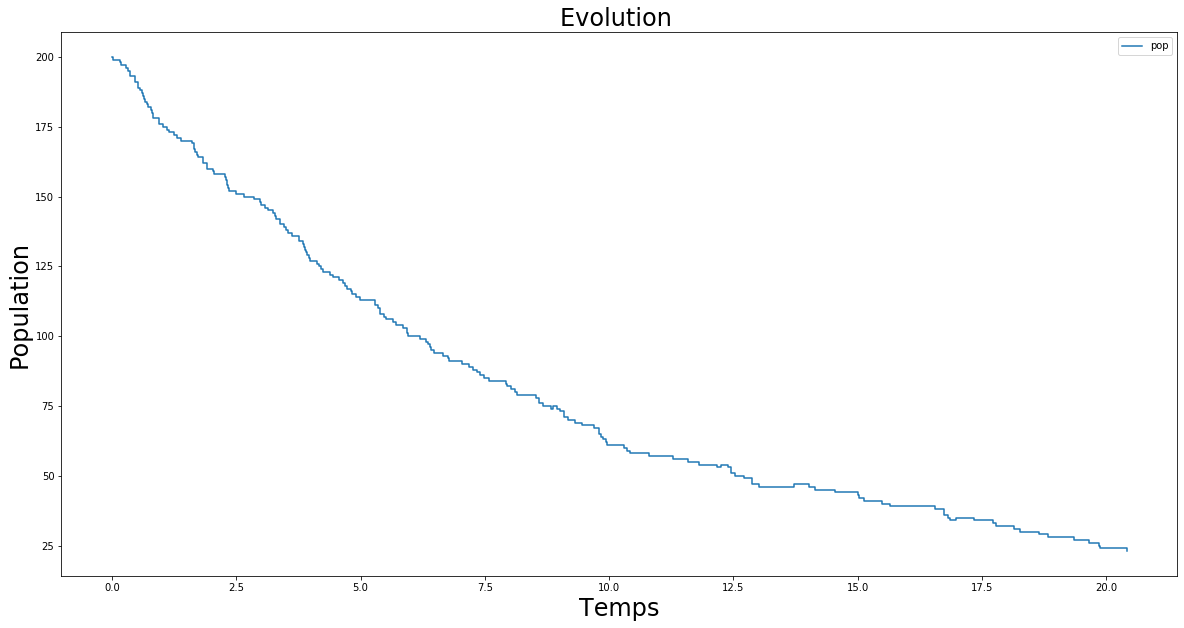

Temps d execution : 0.27423930168151855 secondes ---


In [66]:
graphe_clients(20, 0.1, 0.1, 200)

## Cas ou a > d

C:\Users\Kraco\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


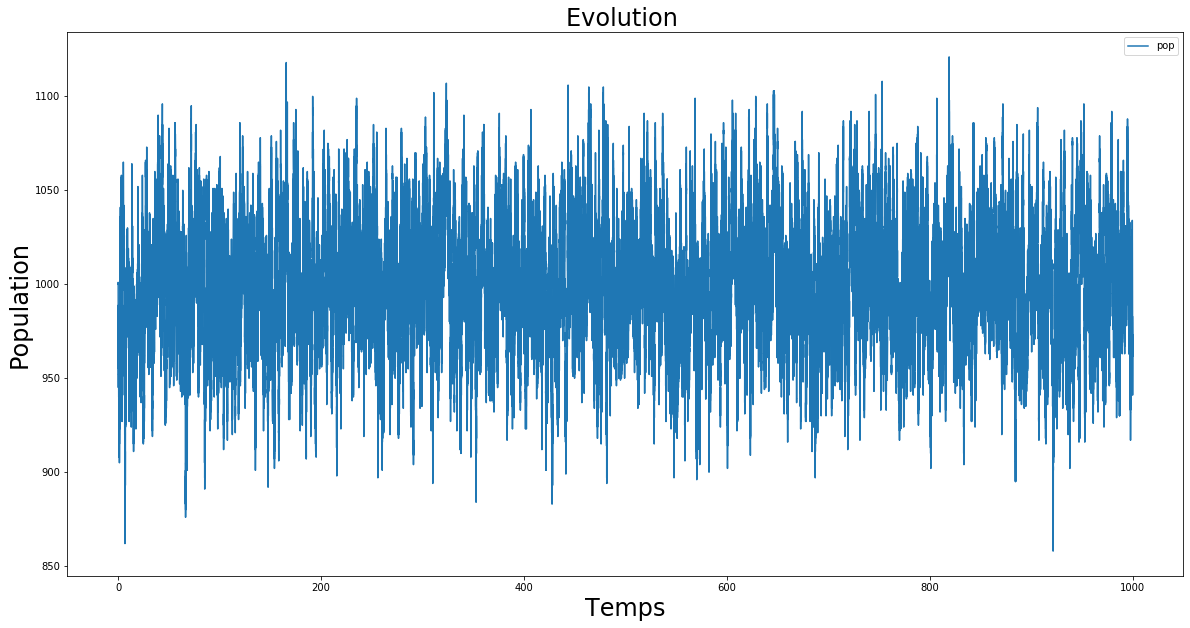

Temps d execution : 67.81436896324158 secondes ---


In [67]:
graphe_clients(1000, 2000, 2, 1000)

C:\Users\Kraco\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


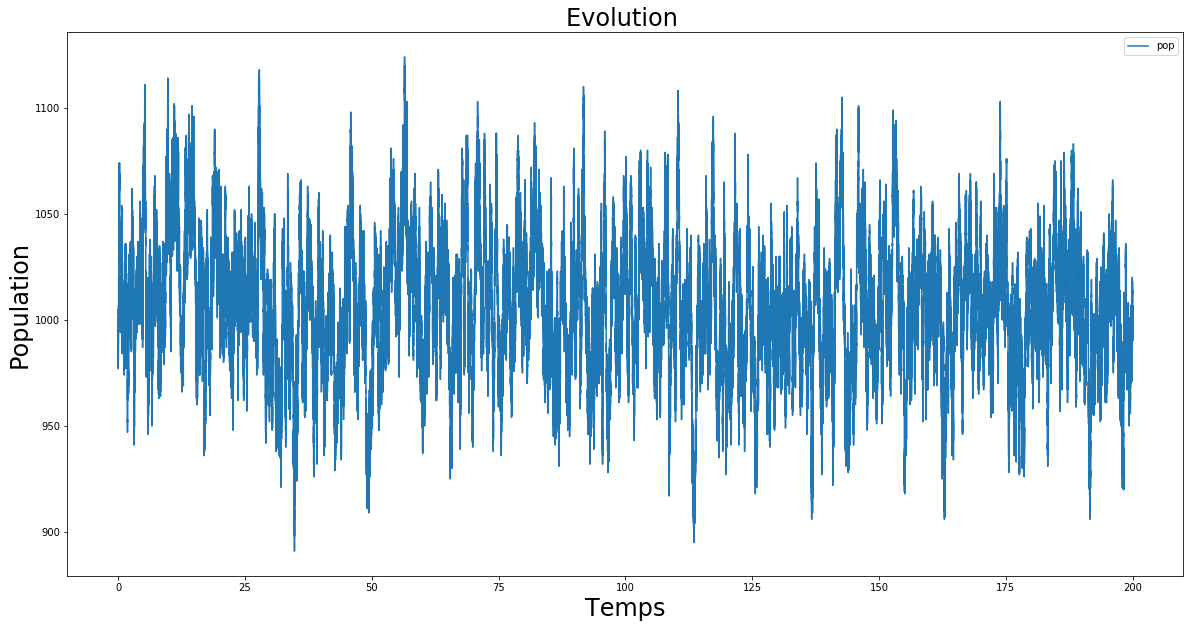

Temps d execution : 20.76223111152649 secondes ---


In [68]:
graphe_clients(200, 3000, 3, 1000)

c:\users\maxim\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:76: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
c:\users\maxim\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:76: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
c:\users\maxim\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


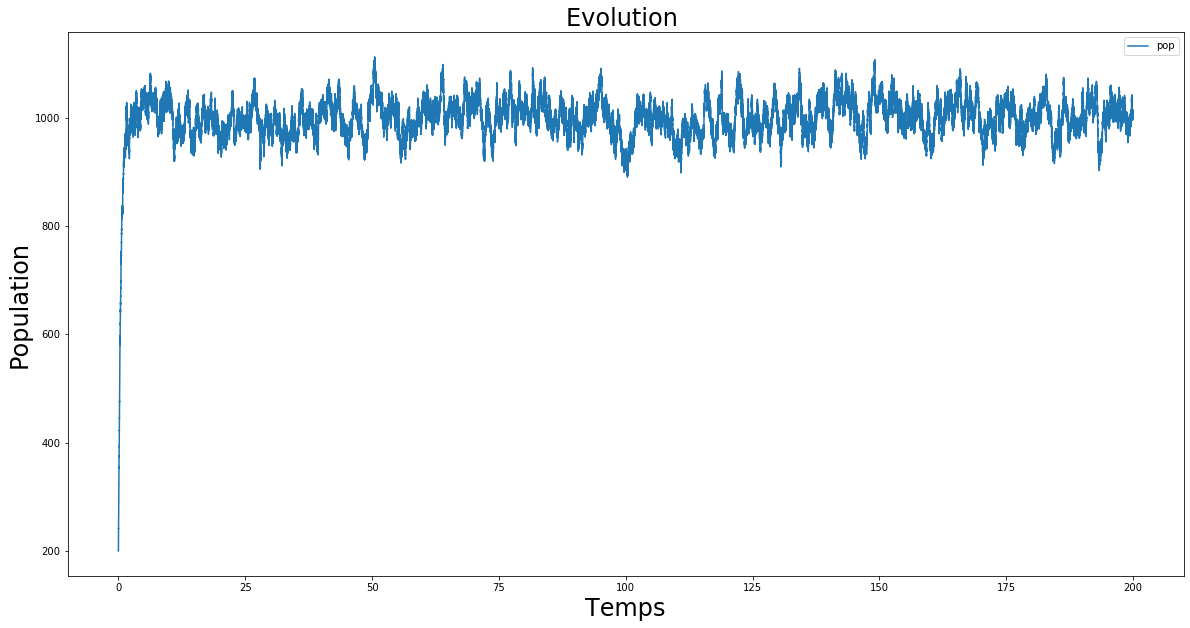

Temps d execution : 19.293461084365845 secondes ---


In [26]:
graphe_clients(200, 2000, 2, 200)

On remarque une augmentation de la population importante jusqu'à arriver à 1000 qui correspond à a/d, c'est le moment où a = n*d

## Evolution du capital et évolution de la clientèle

Enfin, la fonction revenu_et_population modélise l'augmentation du capital en même temps que l'évolution de la clientèle.   
Cette fonction trace deux graphiques. En premier lieu, Evolution du capital en fonction du temps. Puis, Evolution de la population. Ainsi, on peut facilement voir l'impact d'une arrivée ou d'un départ sur les revenus.

In [7]:
def revenu_et_population(temps, cap, rec, a, d, lam, mu,popu_init):
    start_time = time.time()
    
    #
    # Peut être prendre 1/a et 1/d
    #
    
    # X : variable aléatoire qui représente les arrivées de paramètre a.
    # Y : variable aléatoire qui représente les départs de paramètre d.
    # Ces variables sont indépendantes donc on peut prendre M = min(X,Y) qui suit une loi expo de paramètre a+d.
    
    T = [] #Tableau des Ti
    #gere le temps
    Pop = [] #Tableau représentant l'ensemble de la population au temps t.
    X = []
    S = []
    R = []
    T_Pop = [] #indice de temps qui correspondent a l'arrivée et au départ des personnes
    Abs_Pop = [] #Abs pour tracer le graphique de la population
    Abs = [] #Abs pour tracer le graphique du capital
    Abs.append(0) #le temps commence a 0
    Abs_Pop.append(0)
    
    
    T.append(0)
    T_Pop.append(0)
    if(popu_init != 0):
        Pop.append(popu_init)
    else:
        Pop.append(0)
   
    X.append(0)
    S.append(0)
    R.append(cap)
        
    somme = 0
    somme_pop = 0
    indice = 0
    ind = 0 
    i = 0  
    indice_temps_pop = 0 

    while( T[ind] < temps ) : # Tant que le temps maximal n'est pas depasse, on continue
        t0 = npr.exponential(1/mu,1) 
        n = Pop[i]
        t = npr.exponential(1/(a+n*d),1)
        z = n*d/(a+n*d) # Proba(X>Y) un départ a lieu avant une arrivée
        
        
        if(t < t0): #il y a une arrivée ou un départ
            r = Rademacher(z)
            somme_pop = somme_pop + t
            T_Pop.append(somme_pop)
            indice_temps_pop =  indice_temps_pop + 1
            
            # On compare, est ce que X > Y --> arrivée
            if(r==-1):
                # Ajustement de la population
                Pop.append(Pop[i])
                Pop.append(Pop[i] + 1)
            
            # Ou Y > X --> départ
            else:
                # Ajustement de la population
                Pop.append(Pop[i])    
                Pop.append(Pop[i] - 1)
    
            Abs_Pop.append(T_Pop[indice_temps_pop])
            Abs_Pop.append(T_Pop[indice_temps_pop])
            i = i + 2
        
        else: #il y a un sinistre
            T.append(somme + t0)  # expovariate(a+d) donne une loi expo de param a+d
            somme = somme + t0    # On  garde en memoire la somme
            # appel de la fonction revenu 
            
            
            X.append(npr.exponential(lam,1))
            R.append(R[indice] + rec*(T[ind]-T[ind-1])*Pop[i])

            
            R.append(R[indice+1] - X[ind])
            Abs.append(T[ind]) # On construit l'abscice qui correspond a nos points que nous allons afficher
            Abs.append(T[ind])
            ind = ind + 1
            indice = indice + 2
            
            # Pour construire le graphe de l'évolution de la clientèle qui correspond au graphique de l'évolution du capital
            # On fait aussi les opérations suivantes
            somme_pop = somme_pop + t0
            T_Pop.append(somme_pop)
            indice_temps_pop =  indice_temps_pop + 1
            Pop.append(Pop[i])
            Pop.append(Pop[i])
            Abs_Pop.append(T_Pop[indice_temps_pop])
            Abs_Pop.append(T_Pop[indice_temps_pop])
            i = i + 2
            
    
    Abs.append(T[ind])
    R.append(R[indice] + rec*(T[ind]-T[ind-1])*Pop[i])
    
    
    plt.plot(Abs,R)
    plt.xlabel("Temps", fontsize = 24)
    plt.ylabel("Capital", fontsize = 24)
    plt.title("Evolution du capital en fonction du temps", fontsize = 24)
    plt.legend(["Cap"])
    plt.savefig("CapitalClientèle1",format='pdf')
    plt.show()
    
    
    
    plt.plot(Abs_Pop,Pop)
    plt.xlabel("Temps", fontsize = 24)
    plt.ylabel("Population", fontsize = 24)
    plt.title("Evolution de la population ", fontsize = 24)
    plt.legend(["pop"])
    plt.savefig("CapitalClientèle2",format='pdf')
    plt.show() 
    
     
    print("Temps d execution : %s secondes ---" % (time.time() - start_time))

## La population ne change pas

On remarque qu'n prennant des paramètres assez petits pour a et d, on peut faire en sorte de se retourver dans le même cas que pour la question 1  

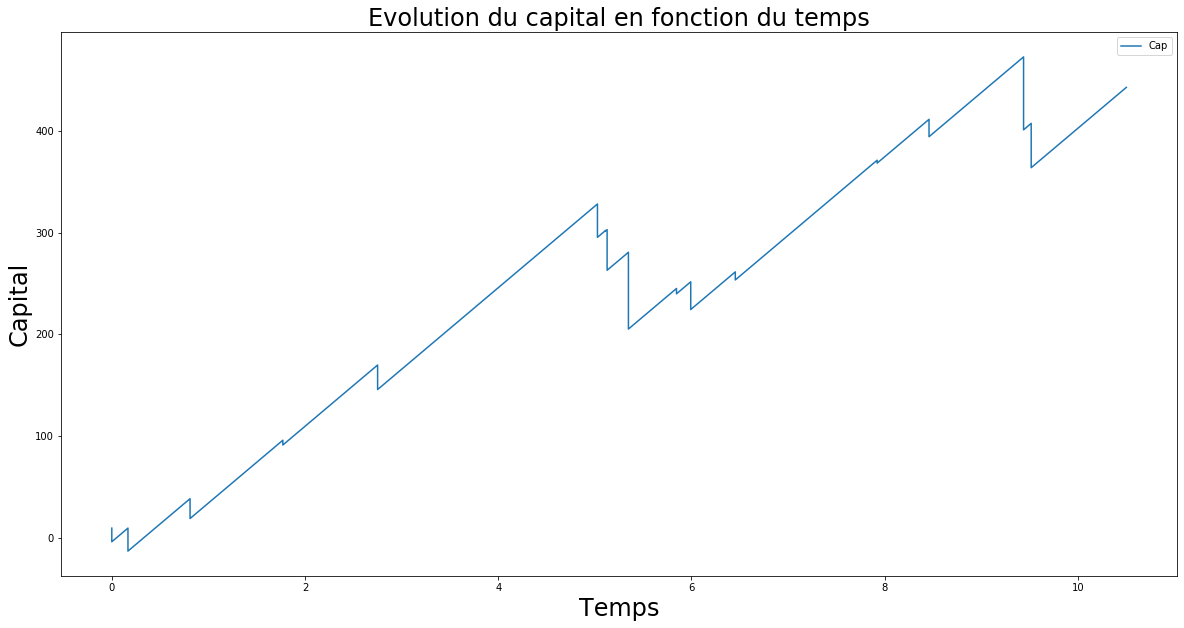

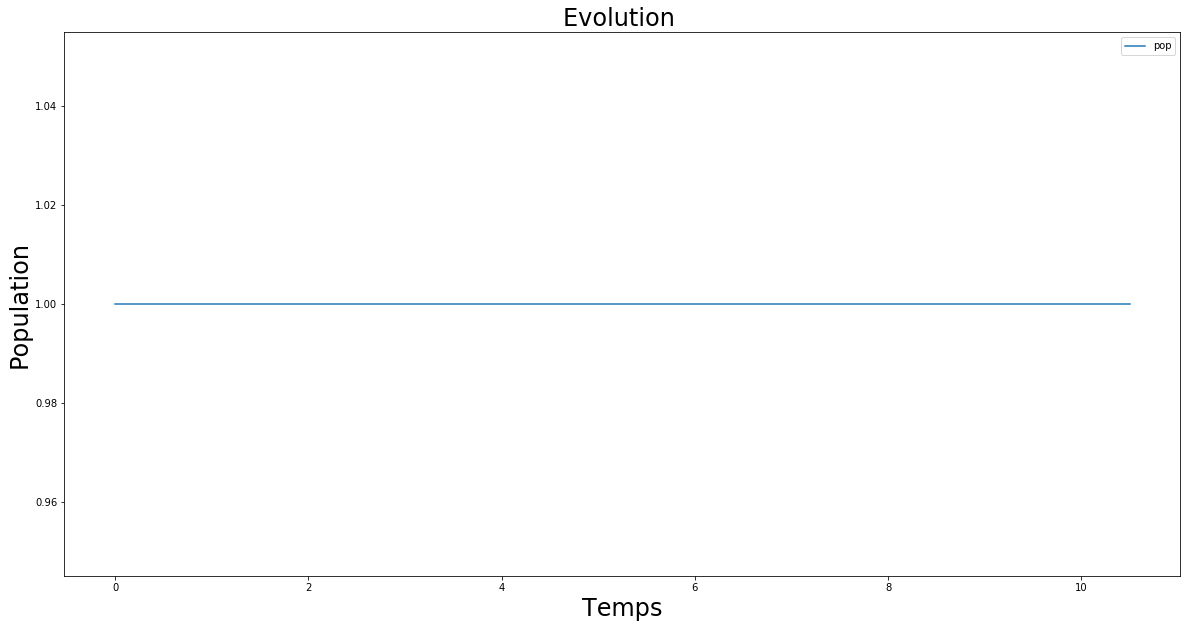

Temps d execution : 0.5291130542755127 secondes ---


In [13]:
revenu_et_population(10, 10, 80, 0.00002, 0.00000002, 30,1, 1)

## La population de change pas beaucoup

Maintenant, il est intéressant que la population fluctue un peu pendant l'intervalle de temps  

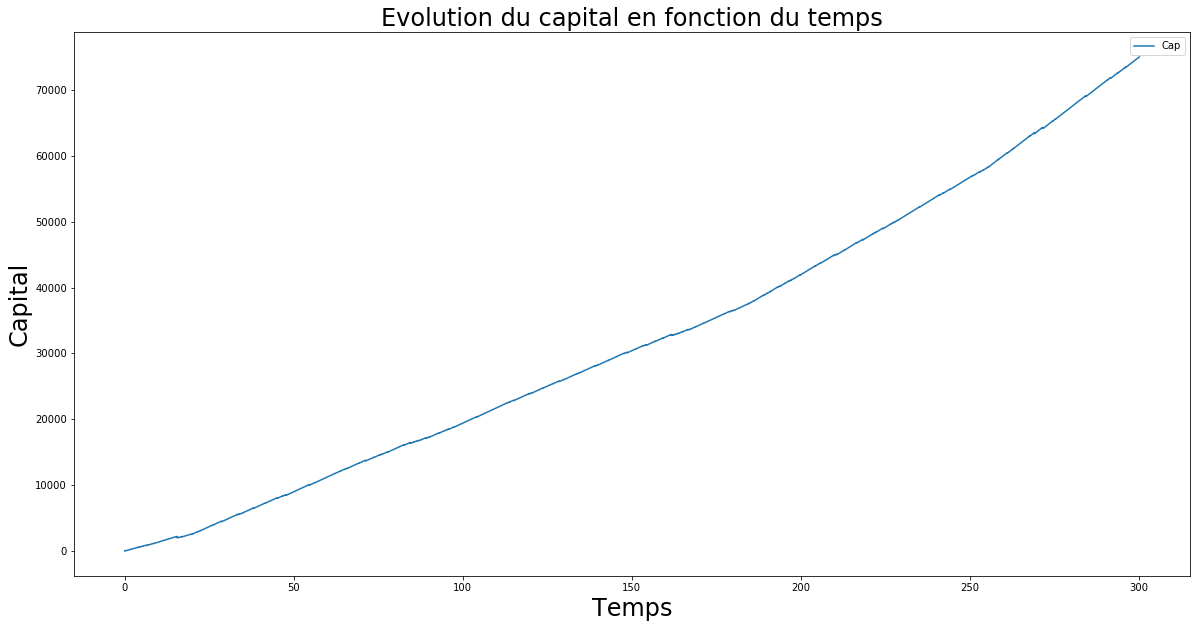

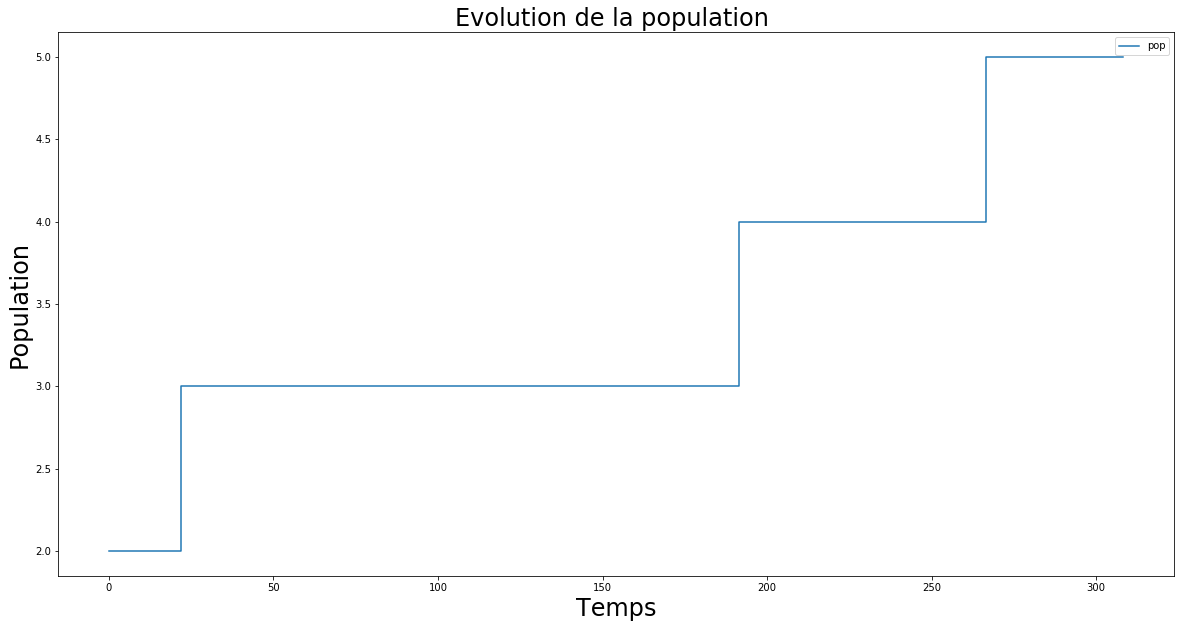

Temps d execution : 0.7771584987640381 secondes ---


In [9]:
revenu_et_population(300, 10, 80, 0.005, 0.000005, 30,1, 2)

On remarque que la pente s'accentue lorsqu'une personne arrive

## La population change beaucoup

Maintenant, on voit qu'avec beaucoup d'arrivées, on obtient une portion d'exponentielle

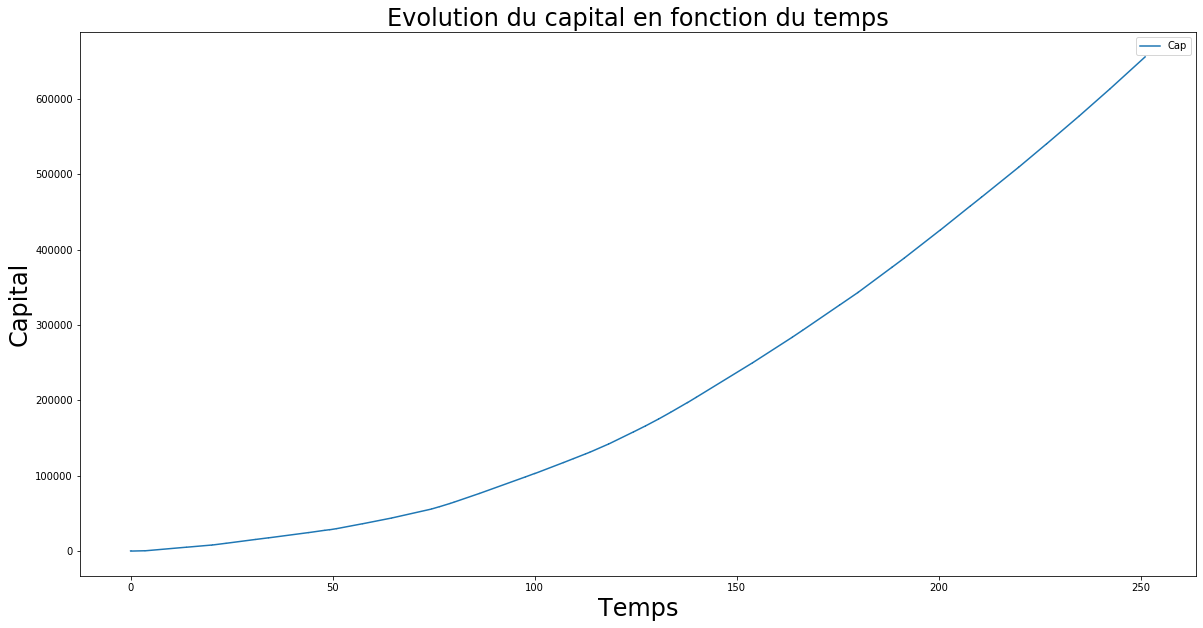

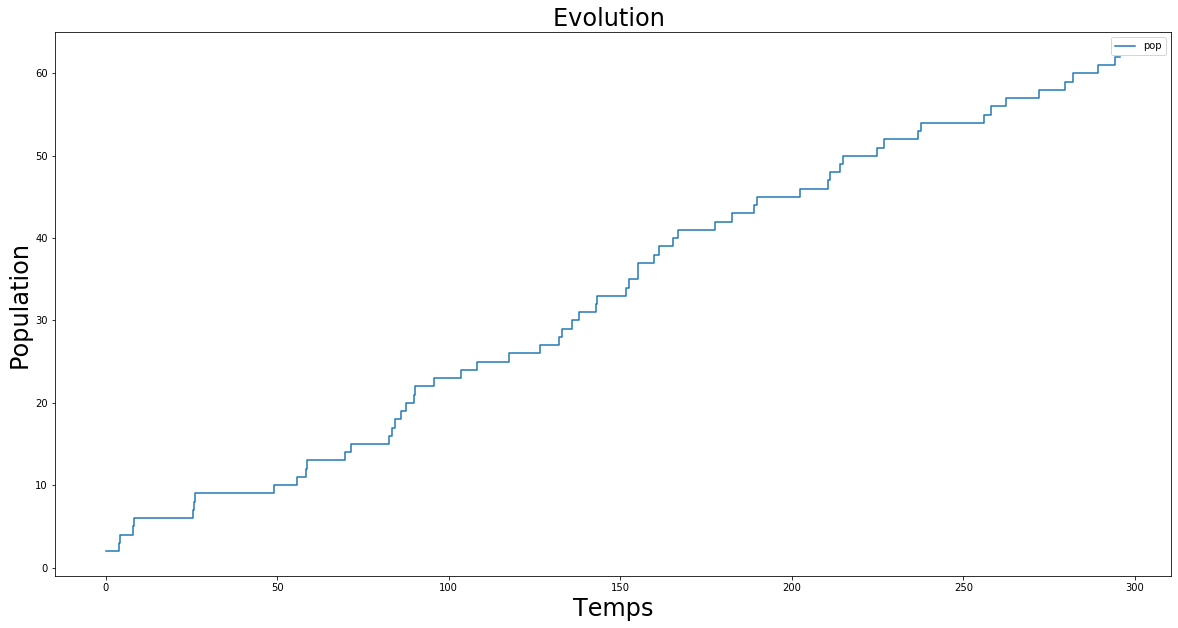

Temps d execution : 0.5337324142456055 secondes ---


In [25]:
revenu_et_population(250, 10, 80, 0.2, 0.0002, 30,1, 2)

# temps, cap, rec, a, d, lam, mu,popu_init

In [ ]:
revenu_et_population(1000, 1000, 80, 2000, 2, 79, 1,20)

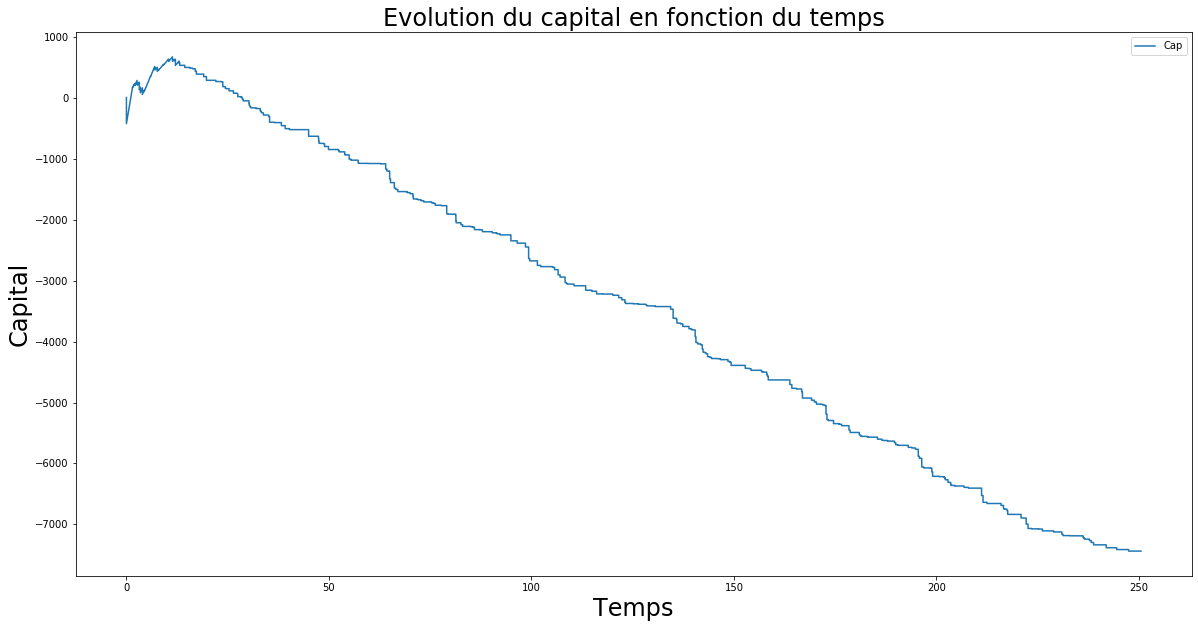

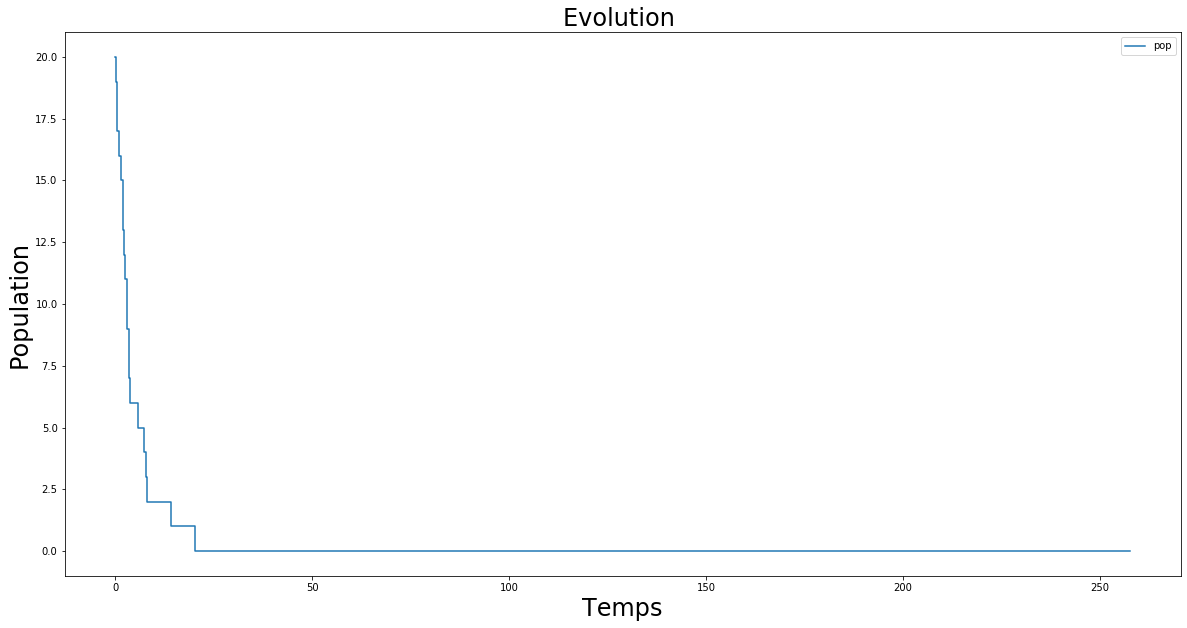

Temps d execution : 0.6115572452545166 secondes ---


In [87]:
revenu_et_population(250, 10, 80, 0.0002, 0.2, 30,1, 20)